# 🚨 Credit Card Default Prediction — End-to-End Notebook

**Goal:** Predict whether a credit card client will default next month using demographic, bill, and payment history data.

**Team:**
Yousef Salah Nage 
& Mahmoud Afifi

---

## 📋 Table of Contents
1. 📦 Imports & Setup  
2. 📥 Data Loading & Initial Checks  
3. 📊 Exploratory Data Analysis (EDA)  
   - 3.1 Target distribution  
   - 3.2 Demographics (SEX, EDUCATION, MARRIAGE, AGE)  
   - 3.3 Credit limit (LIMIT_BAL)  
   - 3.4 Payment status (PAY_0..PAY_6) distributions  
   - 3.5 Bill statement amounts (BILL_AMT1..6)  
   - 3.6 Payment amounts (PAY_AMT1..6)  
   - 3.7 Correlation heatmap  
4. 🛠 Feature Engineering & Preprocessing  
5. 🤖 Model Training (Logistic Regression)  
6. 📈 Evaluation & Confusion Matrices  
7. 💾 Save Model & Features  
8. ✅ Notes & Next Steps


## 1. 📦 Imports & Setup
All required libraries are imported here. Also configure global settings (warnings, plotting style, random seed) for consistency.


In [93]:
# 📦 1. Imports & Setup
import os
import warnings
warnings.filterwarnings("ignore")

# Data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)

# Utilities
import joblib

# Plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (9, 5)


## 2. 📥 Data Loading & Initial Checks
Load the credit card default dataset. Check dataset shape, column names, data types, and preview a few rows to understand the structure.


In [94]:
# 📥 2. Load & Inspect the dataset
# Replace data_path with your actual CSV path if different
data_path = "C:\\Users\\kh\\Graduation PJ\\UCI_Credit_Card.csv" 
df = pd.read_csv(data_path)

# Quick peek
df.shape


(30000, 25)

In [95]:
# Basic info about columns, dtypes and a first look
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [96]:
# Descriptive statistics for numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [97]:
# Check missing values and duplicates
print("Missing values per column:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())


Missing values per column:
 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Number of duplicate rows: 0


## 3. 📊 Exploratory Data Analysis (EDA)
Analyze and visualize the dataset to uncover patterns, distributions, and correlations.


### 3.1 Target Distribution


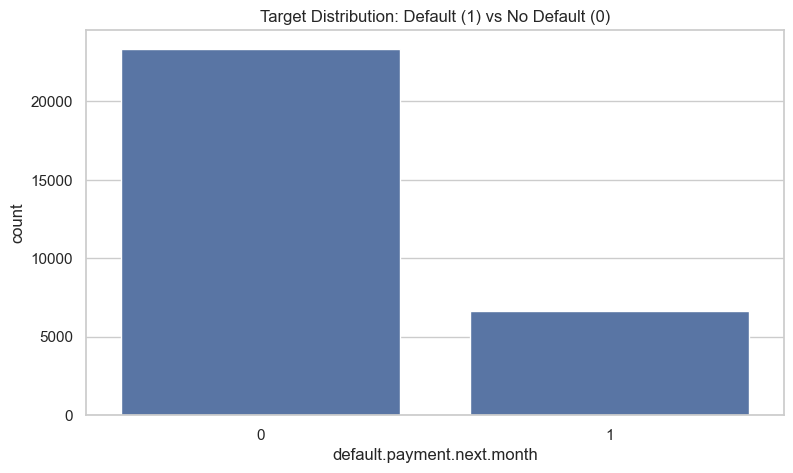

In [98]:
# 📊 3.1 Target distribution: default.payment.next.month
target_col = "default.payment.next.month"
sns.countplot(x=target_col, data=df)
plt.title("Target Distribution: Default (1) vs No Default (0)")
plt.show()


## 🔍 Our Observations:
- The target variable is **imbalanced**, with far more non-defaults (0) than defaults (1).  
- Around **78% did not default**, while only **22% defaulted**.  
- This imbalance may cause the model to **underpredict defaults**, which are critical to identify.  
- **Class balancing techniques** (e.g., class weights or resampling) will be necessary for reliable predictions.


### 3.2 👥 Demographics (SEX, EDUCATION, MARRIAGE, AGE)
Analyze demographic features and their relationship with default rates.


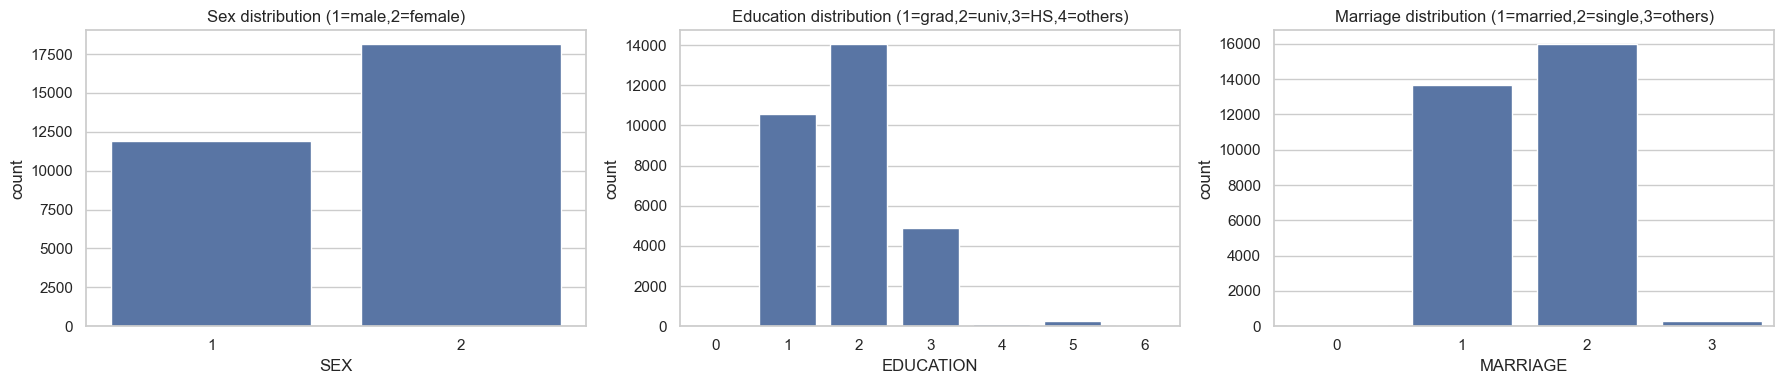

In [99]:
# 📊 3.2 Demographics: SEX, EDUCATION, MARRIAGE
fig, axes = plt.subplots(1, 3, figsize=(18,4))

sns.countplot(x="SEX", data=df, ax=axes[0])
axes[0].set_title("Sex distribution (1=male,2=female)")

sns.countplot(x="EDUCATION", data=df, ax=axes[1])
axes[1].set_title("Education distribution (1=grad,2=univ,3=HS,4=others)")

sns.countplot(x="MARRIAGE", data=df, ax=axes[2])
axes[2].set_title("Marriage distribution (1=married,2=single,3=others)")

plt.tight_layout()
plt.show()



## 🔍 Our Observations:
- The dataset contains more **females (label 2)** than males, with **~18,000 females vs. ~12,000 males**.  
- **University education (label 2)** is the most common, followed by graduate school (label 1); categories **0, 5, 6** likely represent invalid or unknown entries and should be handled.  
- Most clients are either **single (label 2)** or **married (label 1)**; category **0 in MARRIAGE** also appears to be an invalid or unclear value.  
- **Data cleaning** is needed to consolidate or remove anomalous values in EDUCATION and MARRIAGE to avoid misleading patterns.  
- These demographic features may be useful categorical predictors once **properly encoded and cleaned**.


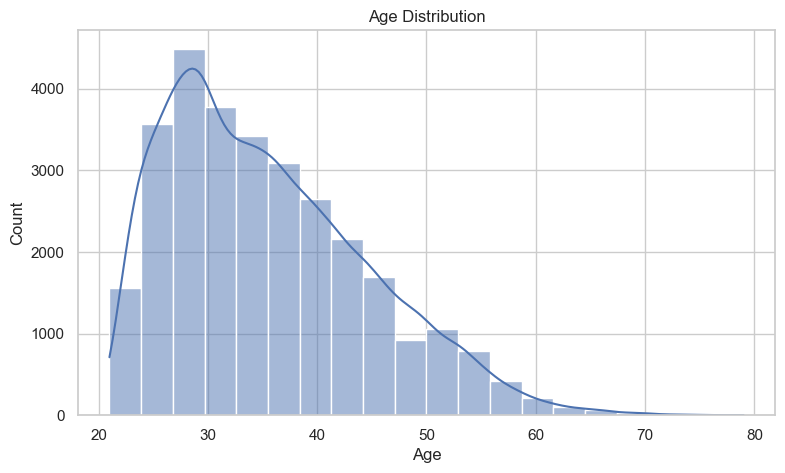

In [100]:
# 📊 3.2 Age distribution
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()


## 🔍 Our Observations:
- The age distribution is **right-skewed**, with most clients aged between **25 and 40 years**.  
- There is a **peak around age 29**, indicating a concentration of younger credit card users.  
- A long tail extends beyond **50 years**, with fewer clients above **60**.  
- **Outliers** above 70 are rare and may not significantly impact the model but should still be reviewed.  
- The skewness suggests that **scaling or transformation** (e.g., normalization) might benefit model performance.


### 3.3 💳 Credit Limit (LIMIT_BAL)
Visualize and summarize the distribution of credit limits.


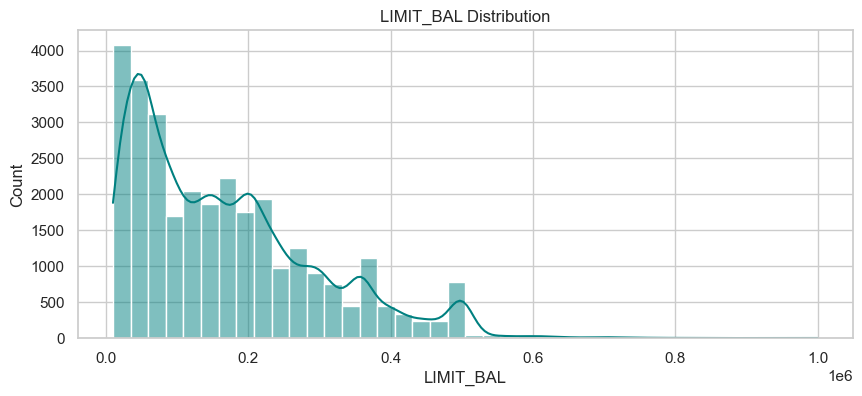

In [101]:
# 📊 3.3 LIMIT_BAL (credit limit) distribution (without log scale)
plt.figure(figsize=(10,4))
sns.histplot(df['LIMIT_BAL'], bins=40, kde=True, color='teal')
plt.title("LIMIT_BAL Distribution")
plt.show()

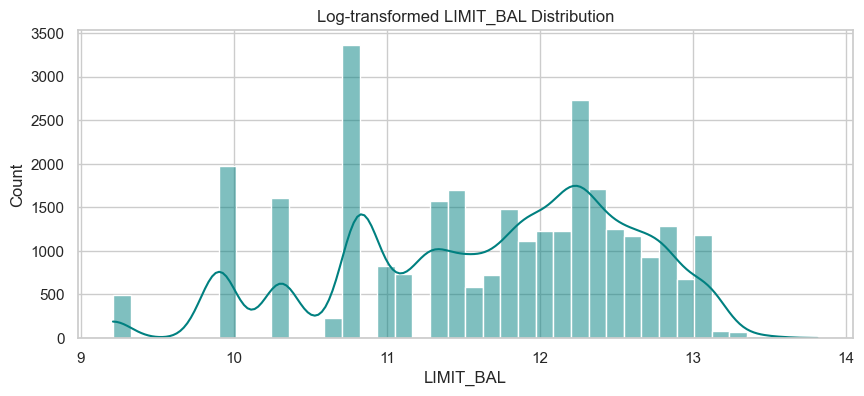

In [102]:
# 📊 3.3 LIMIT_BAL (credit limit) distribution (log scale)
plt.figure(figsize=(10,4))
sns.histplot(np.log1p(df['LIMIT_BAL']), bins=40, kde=True, color='teal')
plt.title("Log-transformed LIMIT_BAL Distribution")
plt.show()


## 🔍 Our Observations:
- The **log transformation** has effectively reduced the original right skew of `LIMIT_BAL`.  
- The distribution now appears **more symmetric**, with slight multimodal patterns indicating **frequent credit limit tiers**.  
- Noticeable peaks occur around **log values ~10, ~11, and ~12**, likely representing standardized credit limit offerings.  
- This transformation will help improve **model stability and performance**, especially for linear models like Logistic Regression.  
- No extreme outliers are visible post-transformation, indicating improved **feature normalization**.


### 3.4 📅 Payment Status (PAY_0..PAY_6) Distributions
Examine repayment status for the past 6 months to identify patterns linked to defaults.


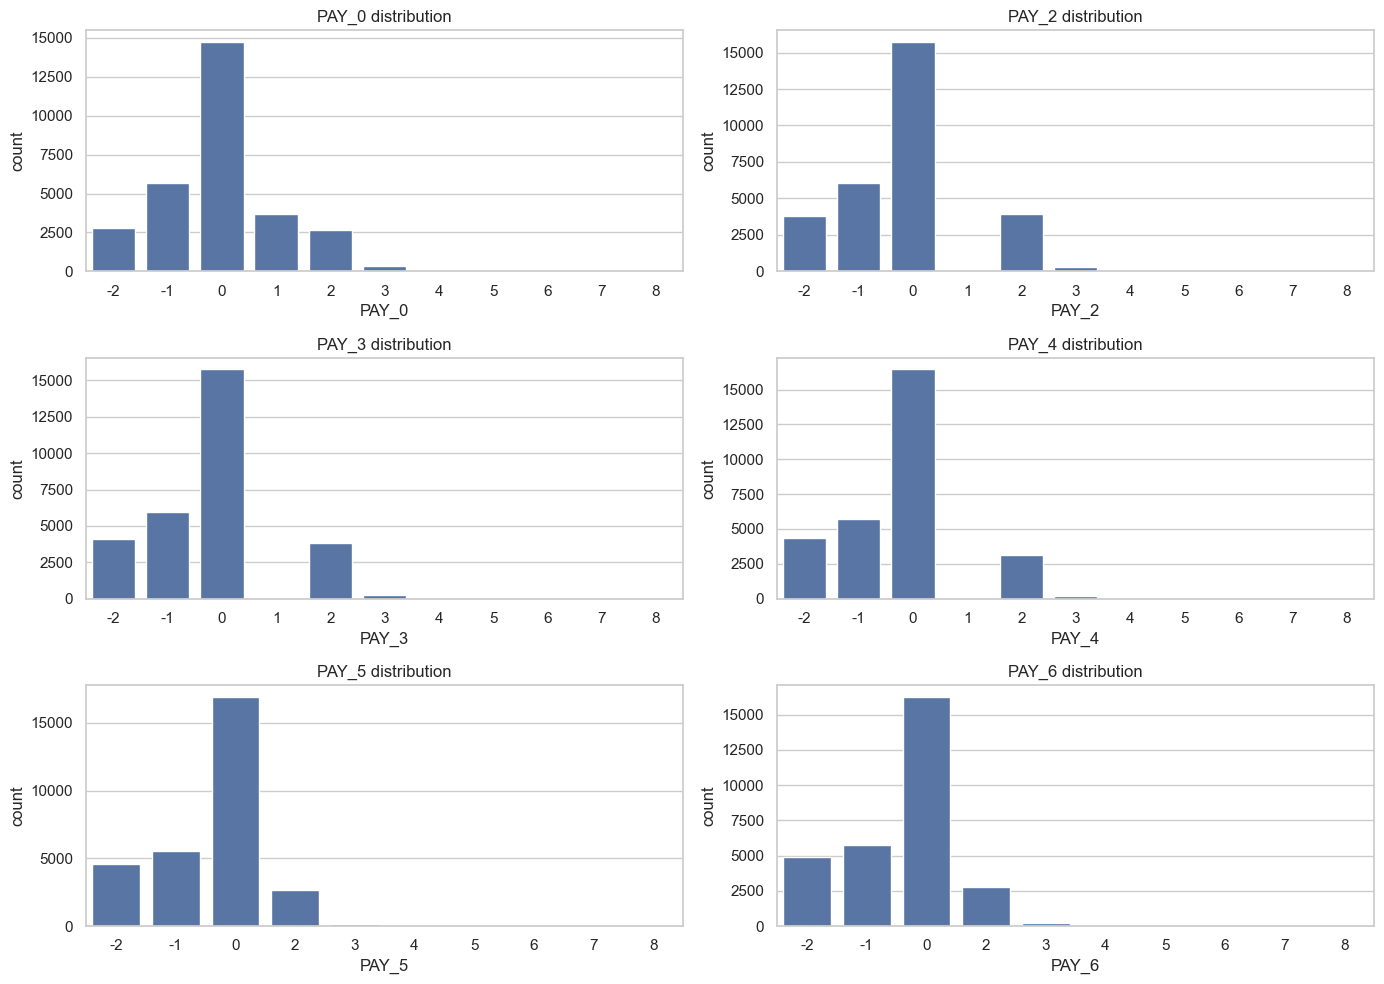

In [103]:
# 📊 3.4 Payment status columns PAY_0..PAY_6
pay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
plt.figure(figsize=(14,10))
for i, col in enumerate(pay_cols, 1):
    plt.subplot(3,2,i)
    sns.countplot(x=col, data=df)
    plt.title(f"{col} distribution")
plt.tight_layout()
plt.show()


## 🔍 Our Observations:
- Across all `PAY_0` to `PAY_6` features, the most frequent value is **0**, indicating clients who paid on time.  
- A substantial portion of values are **-1**, which represents clients who paid **duly (no delay)** — this should be clarified or re-coded for modeling clarity.  
- Delays of **1 to 2 months** are also common, while extreme delays (**values > 3**) are rare but present.  
- The presence of values as high as **7 or 8** indicates **serious delinquencies** that may correlate strongly with default risk.  
- These features are **categorical in nature**, despite being numeric, and should be treated carefully — **ordinal encoding** may be appropriate.  
- The consistent distribution across months suggests **payment behavior stability**, which may be a strong predictor in logistic regression.


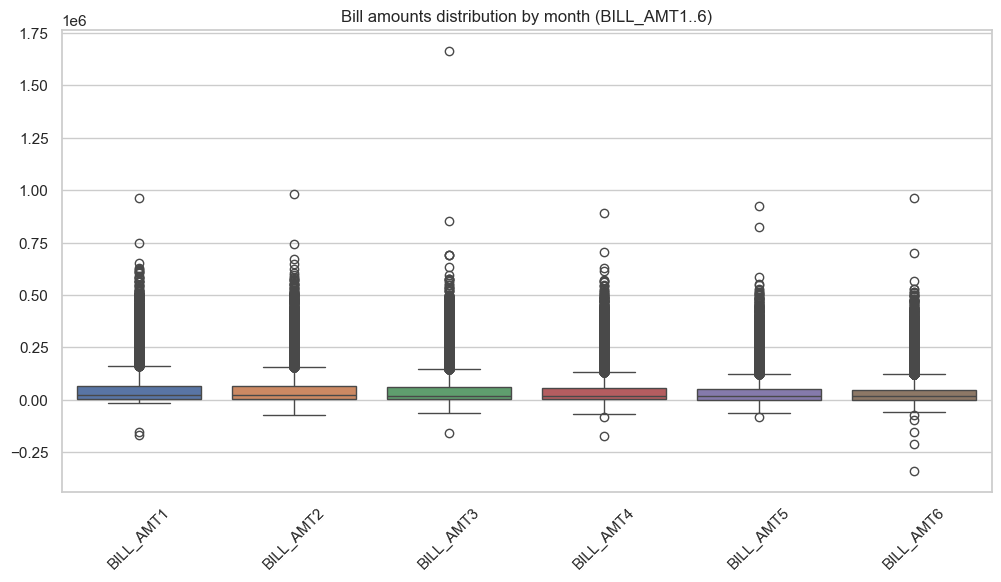

In [104]:
# 📊 3.5 Bill statement amounts (BILL_AMT1..BILL_AMT6) boxplots
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
plt.figure(figsize=(12,6))
sns.boxplot(data=df[bill_cols])
plt.title("Bill amounts distribution by month (BILL_AMT1..6)")
plt.xticks(rotation=45)
plt.show()

## 🔍 Our Observations:
- All `BILL_AMT1` to `BILL_AMT6` distributions are **highly right-skewed**, with a large number of **extreme positive outliers**.  
- Most bill amounts cluster below **NT$100,000**, but some exceed **NT$1,000,000**, which may represent high-risk or premium customers.  
- A few **negative values** appear across all months, which may indicate refunds or data entry issues — these should be **reviewed or cleaned**.  
- The overall distribution is **consistent across months**, suggesting **stable billing patterns** for most clients.  
- Due to the skewness and scale, **log transformation and feature scaling** are recommended before applying Logistic Regression.


### 3.6 💵 Payment Amounts (PAY_AMT1..PAY_AMT6)
Explore the payment amounts for each of the last 6 months.


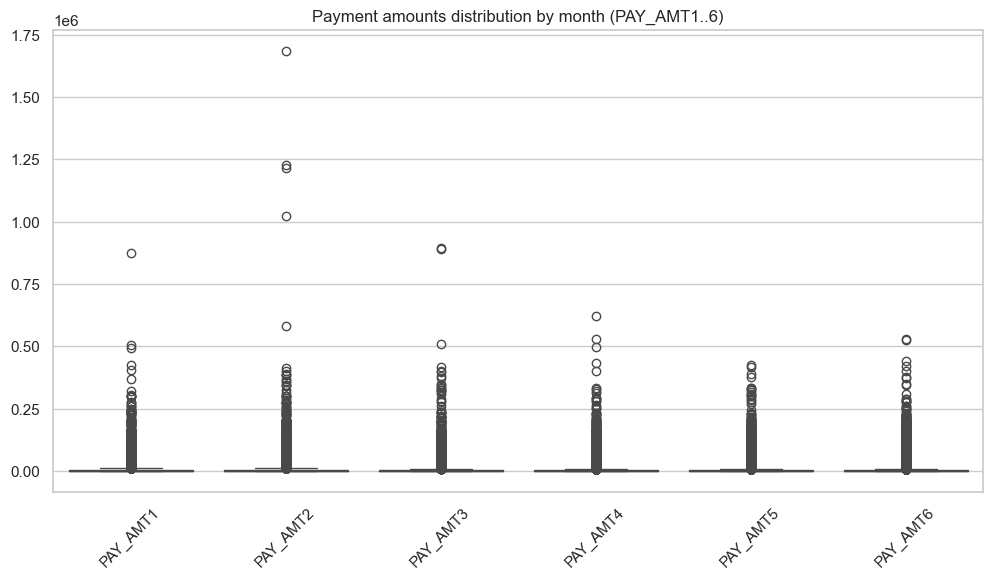

In [105]:
# 📊 3.6 Payment amounts (PAY_AMT1..PAY_AMT6) boxplots
payamt_cols = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
plt.figure(figsize=(12,6))
sns.boxplot(data=df[payamt_cols])
plt.title("Payment amounts distribution by month (PAY_AMT1..6)")
plt.xticks(rotation=45)
plt.show()




## 🔍 Our Observations:
- Payment amounts (PAY_AMT1 to PAY_AMT6) are **highly right-skewed** with many extreme outliers exceeding NT$500,000.  
- Most payments cluster near the lower end, indicating many customers pay smaller amounts regularly.  
- The presence of very large payments could represent full or partial settlements of large bills, potentially signaling lower default risk.  
- Consistency across months suggests stable payment behavior patterns over time.  
- Skewness and outliers highlight the need for **log transformation and robust scaling** before modeling.


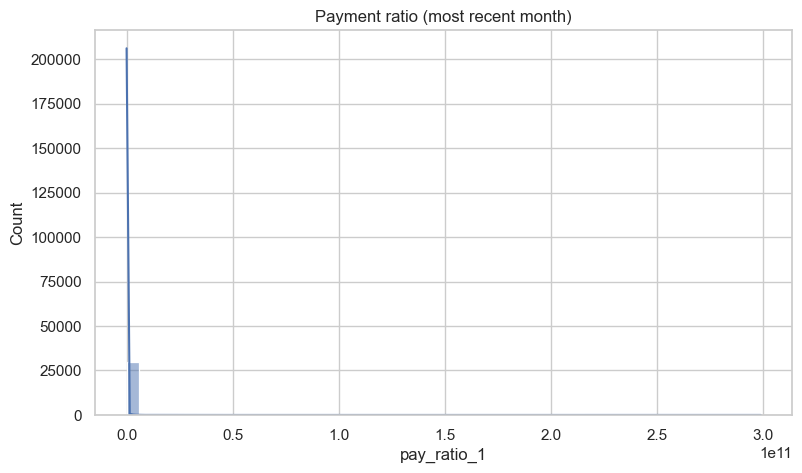

In [106]:
# Feature: recent payment ratio (PAY_AMT1 / BILL_AMT1)
df['pay_ratio_1'] = df['PAY_AMT1'] / (df['BILL_AMT1'] + 1e-6)
sns.histplot(df['pay_ratio_1'].replace([np.inf, -np.inf], np.nan).fillna(0), bins=50, kde=True)
plt.title("Payment ratio (most recent month)")
plt.show()


## 🔍 Observation:
- The payment ratio for the most recent month is **extremely right-skewed** with some **outliers reaching very high values (~10¹¹)**.  
- Majority of customers have a very low payment ratio close to zero, indicating minimal or no payments relative to their bills.  
- The extreme outliers may be data errors or exceptional cases and should be handled carefully during preprocessing.  
- This skewness suggests the need for **outlier treatment** and **possibly log transformation** for modeling.


### 3.7 🔥 Correlation Heatmap
Visualize correlations between numerical features and identify strong relationships with the target.


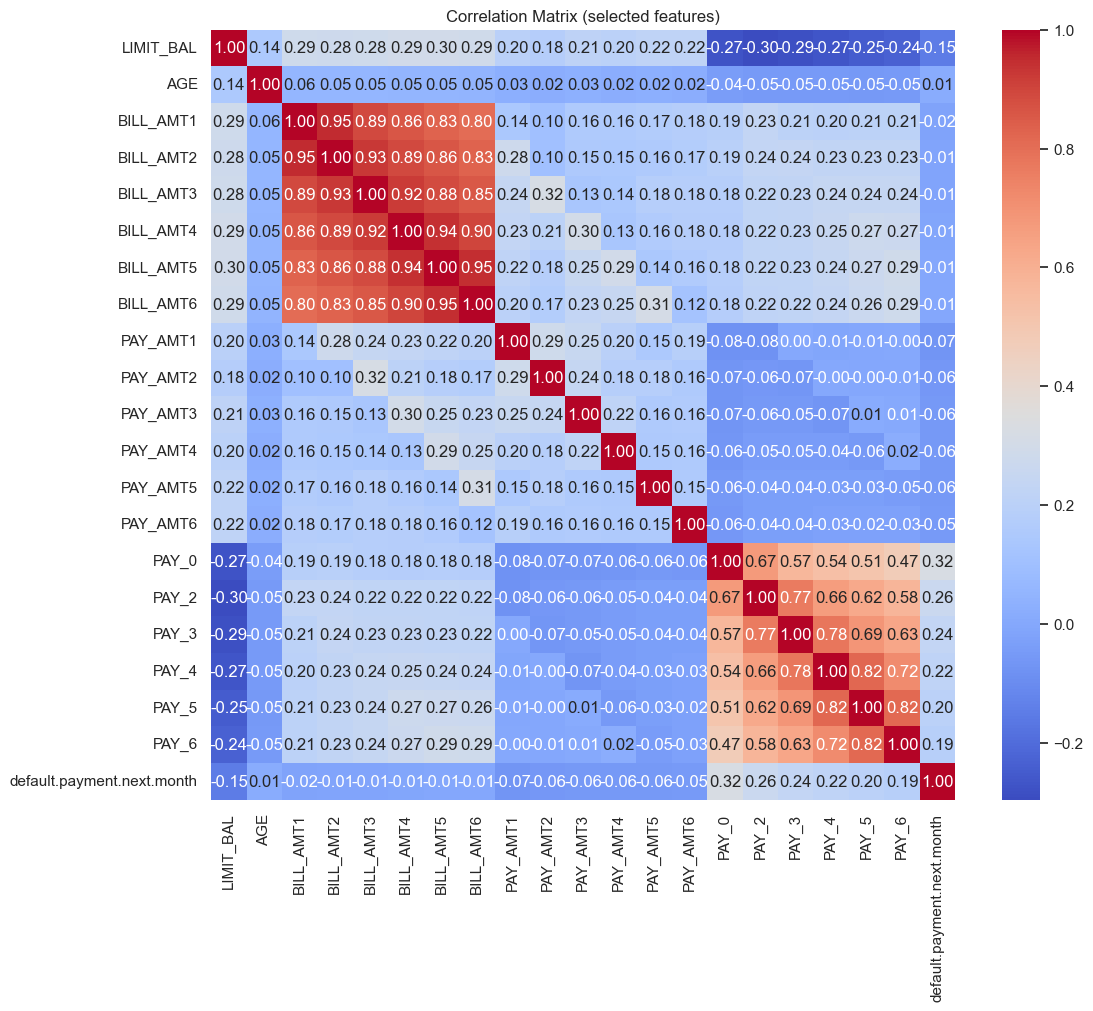

In [107]:
# 📊 3.7 Correlation heatmap (select numeric + target)
num_cols = ['LIMIT_BAL','AGE'] + bill_cols + payamt_cols + pay_cols + ['default.payment.next.month']
corr_df = df[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (selected features)")
plt.show()



### Correlation Matrix Observations

- **BILL_AMT columns** are highly correlated (0.80–0.95), showing consistent billing over months.  
- **PAY_AMT columns** have moderate correlations (0.12–0.31), indicating some payment consistency.  
- **PAY_0 to PAY_6** show strong correlations (0.47–0.82), reflecting similar payment behavior monthly.  
- Negative correlation between **PAY_ variables and LIMIT_BAL** (-0.15 to -0.30) suggests higher limits link to fewer delays.  
- Default risk correlates positively with payment delays (0.19–0.32) and negatively with credit limit (-0.15).  
- **AGE** has minimal correlation with other features.  

**Summary:** Payment delays and credit limits are key to predicting default risk.


## 4. 🛠 Feature Engineering & Preprocessing
Perform transformations, handle categorical encoding, scale numerical variables, and prepare the dataset for modeling.


In [108]:
# 🛠 4. Data cleaning & categorical mapping
# Copy the original df if you want to preserve it
data = df.copy()

# Map obvious 'unknown' categories in EDUCATION and MARRIAGE
data['EDUCATION'] = data['EDUCATION'].replace({0:4, 5:4, 6:4})  # map 0,5,6 to 'others' (4)
data['MARRIAGE'] = data['MARRIAGE'].replace({0:3})  # map 0 to 'others' if present

# Convert SEX, EDUCATION, MARRIAGE to categorical dtype
for col in ['SEX','EDUCATION','MARRIAGE']:
    data[col] = data[col].astype('category')



## 🔍 Our Observations:
 - Several categories encoded as 0/5/6 are effectively 'other/unknown'. Consolidating reduces noise.
- Ensure categories are consistent so encoding downstream is clean.

In [109]:
# 🛠 4.1 Feature Engineering

# 1) Log transform highly skewed financial features
for c in bill_cols + ['LIMIT_BAL']:
    data[f"log_{c}"] = np.log1p(data[c])

# 2) Create payment summary features
data['total_bill'] = data[bill_cols].sum(axis=1)
data['total_pay'] = data[payamt_cols].sum(axis=1)
data['avg_pay_ratio'] = data[payamt_cols].sum(axis=1) / (data[bill_cols].sum(axis=1) + 1e-6)

# 3) Trend feature: count months with delayed payment (>0)
data['delayed_months'] = (data[pay_cols] > 0).sum(axis=1)

# 4) Recent max delay
data['max_delay'] = data[pay_cols].max(axis=1)

# 5) Average bill & payment amounts (NEW, if not already created)
if 'avg_bill_amt' not in data.columns:
    data['avg_bill_amt'] = data[bill_cols].mean(axis=1)

if 'avg_pay_amt' not in data.columns:
    data['avg_pay_amt'] = data[payamt_cols].mean(axis=1)

# 6) New ratios
data['avg_bill_limit_ratio'] = 1 - (data['avg_bill_amt'] / data['LIMIT_BAL'])
data['avg_pay_limit_ratio'] = data['avg_pay_amt'] / data['LIMIT_BAL']

# 7) Handle division by zero or infinity
for col in ['avg_bill_limit_ratio', 'avg_pay_limit_ratio']:
    data[col] = data[col].replace([float('inf'), -float('inf')], 0).fillna(0)

print("✅ All original + new features added successfully")

✅ All original + new features added successfully



## 🔍 Our Observations:
 - Summary features (total_bill, total_pay, delayed_months) often capture customer behavior better than single-month metrics.
 - Log transforms reduce skew and stabilize variance for models.
 - 'delayed_months' and 'max_delay' are strong expected predictors of default.

In [110]:
# 🛠 4.2 Encoding & Feature Selection

# Candidate features (including new engineered ones)
features = [
    'LIMIT_BAL', 'AGE', 'SEX', 'EDUCATION', 'MARRIAGE',
    'log_BILL_AMT1', 'log_BILL_AMT2', 'log_BILL_AMT3', 
    'log_BILL_AMT4', 'log_BILL_AMT5', 'log_BILL_AMT6',
    'total_bill', 'total_pay', 'avg_pay_ratio', 
    'delayed_months', 'max_delay', 
    'avg_bill_amt', 'avg_pay_amt', 
    'avg_bill_limit_ratio', 'avg_pay_limit_ratio'
]

# ✅ Ensure log columns exist
for col in ['log_BILL_AMT1','log_BILL_AMT2','log_BILL_AMT3',
            'log_BILL_AMT4','log_BILL_AMT5','log_BILL_AMT6']:
    base_col = col.replace('log_', '')
    if col not in data.columns and base_col in data.columns:
        data[col] = np.log1p(data[base_col])

# ✅ Ensure new engineered features exist
if 'avg_bill_amt' not in data.columns:
    data['avg_bill_amt'] = data[bill_cols].mean(axis=1)

if 'avg_pay_amt' not in data.columns:
    data['avg_pay_amt'] = data[payamt_cols].mean(axis=1)

if 'avg_bill_limit_ratio' not in data.columns:
    data['avg_bill_limit_ratio'] = 1 - (data['avg_bill_amt'] / data['LIMIT_BAL'])

if 'avg_pay_limit_ratio' not in data.columns:
    data['avg_pay_limit_ratio'] = data['avg_pay_amt'] / data['LIMIT_BAL']

# Handle division by zero or infinity
for col in ['avg_bill_limit_ratio', 'avg_pay_limit_ratio']:
    data[col] = data[col].replace([float('inf'), -float('inf')], 0).fillna(0)

# ✅ Prepare X and y
X = data[features].copy()
y = data['default.payment.next.month'].copy()

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

print("✅ Features prepared. Shape:", X.shape)

✅ Features prepared. Shape: (30000, 23)


## 🔍 Our Observations:
 - We drop_first to avoid dummy trap for linear models.
- Feature list balances raw and engineered features; you can expand (e.g., payment ratios by month).

In [111]:
# 🛠 4.3 Train / Validation / Test split (stratify by target to preserve class ratio)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.17647, random_state=42, stratify=y_train_val
)
# 0.17647*0.85 ≈ 0.15 => overall ~70/15/15 split
# Replace inf and -inf with NaN
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_val = X_val.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Fill NaN with 0 (or use another strategy)
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)
X_test = X_test.fillna(0)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame if you want column names preserved
X_train = pd.DataFrame(X_train, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)



## 🔍 Our Observations:
 - Stratified splitting preserves class balance across sets.
 - StandardScaler is appropriate for logistic regression; saves pipeline consistency.

## 5. 🤖 Model Training (Logistic Regression)
Train a Logistic Regression model using the prepared training dataset.


In [112]:
# 🤖 5. Model Training — Logistic Regression
model = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'



## 🔍 Our Observations:
 - Using class_weight='balanced' helps when default class is minority.
 - liblinear is robust for small-to-medium datasets; consider 'saga' for large datasets or L1 penalty.
 - Evaluate on validation set and inspect calibration.

## 6. 📈 Evaluation & Confusion Matrices
Evaluate model performance using accuracy, precision, recall, and F1-score.  
Visualize results with confusion matrices for train, validation, and test sets.


In [113]:
# 📈 6. Initial evaluation on validation set
y_val_pred = model.predict(X_val)
acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred)
rec = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc = roc_auc_score(y_val, model.predict_proba(X_val)[:,1])

print(f"Validation metrics — Acc: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}, ROC-AUC: {roc:.3f}")


Validation metrics — Acc: 0.751, Precision: 0.454, Recall: 0.620, F1: 0.524, ROC-AUC: 0.765


In [114]:
from sklearn.metrics import recall_score

# Predict probabilities
y_probs = model.predict_proba(X_val)[:, 1]

# Lower threshold to 0.3
threshold = 0.3
y_pred_custom = (y_probs >= threshold).astype(int)

# Check recall
recall = recall_score(y_val, y_pred_custom)
acc = accuracy_score(y_val, y_pred_custom)

print(f"Recall at threshold {threshold}: {recall:.4f}")
print(f"Accuracy {acc*100:.2f}%")


Recall at threshold 0.3: 0.8975
Accuracy 47.09%


In [122]:
from sklearn.metrics import recall_score, accuracy_score
import numpy as np

# Predict probabilities for the positive class
y_probs = model.predict_proba(X_val)[:, 1]

print("Threshold | Recall   | Accuracy")
print("-" * 30)

# Loop over thresholds from 0.10 to 0.50
for t in np.arange(0.10, 0.55, 0.05):
    y_pred_custom = (y_probs >= t).astype(int)
    recall = recall_score(y_val, y_pred_custom)
    accuracy = accuracy_score(y_val, y_pred_custom)
    print(f"{t:.2f}      | {recall:.4f} | {accuracy:.4f}")

Threshold | Recall   | Accuracy
------------------------------
0.10      | 1.0000 | 0.2249
0.15      | 0.9960 | 0.2431
0.20      | 0.9819 | 0.2789
0.25      | 0.9487 | 0.3664
0.30      | 0.8975 | 0.4709
0.35      | 0.8171 | 0.5860
0.40      | 0.7477 | 0.6758
0.45      | 0.6714 | 0.7198
0.50      | 0.6201 | 0.7509


In [132]:
# 🔄 5.x Train Logistic Regression with Polynomial Features (degree=5)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

# تحديد الـ features
selected_feats = [
    'LIMIT_BAL', 'AGE', 'total_bill', 'total_pay',
    'avg_pay_ratio', 'delayed_months', 'max_delay', 'avg_bill_limit_ratio'
]

# إنشاء Polynomial Features بدرجة 5
poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly.fit_transform(X_train[selected_feats])
X_val_poly = poly.transform(X_val[selected_feats])
X_test_poly = poly.transform(X_test[selected_feats])

# تدريب Logistic Regression
log_reg_poly = LogisticRegression(max_iter=5000, solver='lbfgs', random_state=42)
log_reg_poly.fit(X_train_poly, y_train)

# التنبؤ
y_train_pred_poly = log_reg_poly.predict(X_train_poly)
y_val_pred_poly = log_reg_poly.predict(X_val_poly)
y_test_pred_poly = log_reg_poly.predict(X_test_poly)

# حساب الدقة و الـ recall
print("🔹 Polynomial Logistic Regression (degree=5)")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_poly):.4f}")
print(f"Val Accuracy:   {accuracy_score(y_val, y_val_pred_poly):.4f}")
print(f"Test Accuracy:  {accuracy_score(y_test, y_test_pred_poly):.4f}")

print(f"Train Recall: {recall_score(y_train, y_train_pred_poly):.4f}")
print(f"Val Recall:   {recall_score(y_val, y_val_pred_poly):.4f}")
print(f"Test Recall:  {recall_score(y_test, y_test_pred_poly):.4f}")

🔹 Polynomial Logistic Regression (degree=5)
Train Accuracy: 0.8123
Val Accuracy:   0.8060
Test Accuracy:  0.8009
Train Recall: 0.3203
Val Recall:   0.2945
Test Recall:  0.2955


In [133]:
# 📈 Logistic Regression with Polynomial Features (degree=3) + Threshold Analysis

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, accuracy_score
import numpy as np

# 1️⃣ Create pipeline with Polynomial Features + Logistic Regression
poly_logreg = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('logreg', LogisticRegression(max_iter=500, solver='lbfgs'))
])

# 2️⃣ Fit model on training data
poly_logreg.fit(X_train, y_train)

# 3️⃣ Predict probabilities on validation data
y_probs_poly = poly_logreg.predict_proba(X_val)[:, 1]

# 4️⃣ Loop through thresholds and evaluate
print("Threshold | Recall   | Accuracy")
print("-" * 30)

for t in np.arange(0.10, 0.55, 0.05):
    y_pred_custom = (y_probs_poly >= t).astype(int)
    recall = recall_score(y_val, y_pred_custom)
    accuracy = accuracy_score(y_val, y_pred_custom)
    print(f"{t:.2f}      | {recall:.4f} | {accuracy:.4f}")

Threshold | Recall   | Accuracy
------------------------------
0.10      | 0.8291 | 0.5498
0.15      | 0.7508 | 0.6444
0.20      | 0.6653 | 0.7060
0.25      | 0.6171 | 0.7378
0.30      | 0.5518 | 0.7540
0.35      | 0.4975 | 0.7702
0.40      | 0.4543 | 0.7889
0.45      | 0.3950 | 0.7969
0.50      | 0.3417 | 0.8024


In [ ]:
# ...existing code without Arabic comments...

Accuracy (Training Set): 73.89%
              precision    recall  f1-score   support

           0      0.881     0.768     0.821     16354
           1      0.438     0.636     0.519      4646

    accuracy                          0.739     21000
   macro avg      0.660     0.702     0.670     21000
weighted avg      0.783     0.739     0.754     21000



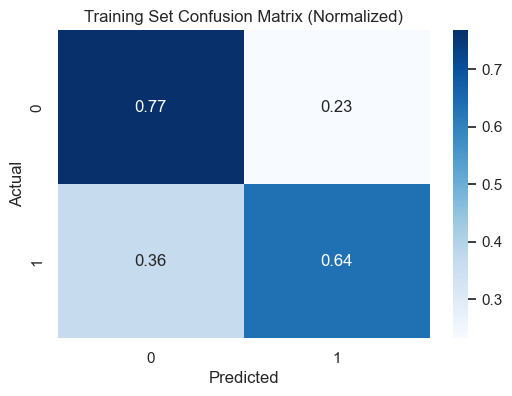

Accuracy (Validation Set): 75.09%
              precision    recall  f1-score   support

           0      0.880     0.788     0.831      3505
           1      0.454     0.620     0.524       995

    accuracy                          0.751      4500
   macro avg      0.667     0.704     0.678      4500
weighted avg      0.785     0.751     0.763      4500



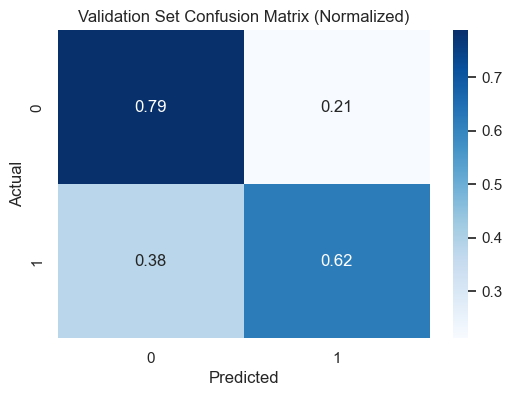

Accuracy (Test Set): 74.42%
              precision    recall  f1-score   support

           0      0.877     0.781     0.826      3505
           1      0.444     0.616     0.516       995

    accuracy                          0.744      4500
   macro avg      0.661     0.698     0.671      4500
weighted avg      0.782     0.744     0.758      4500



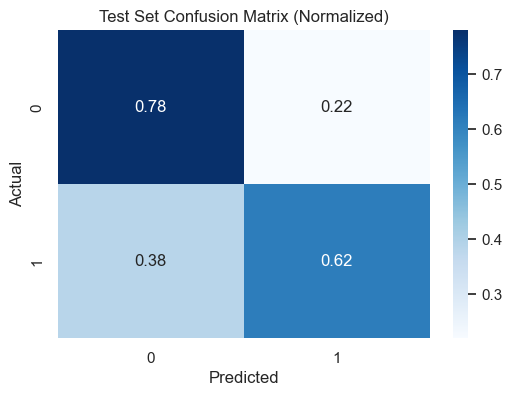

array([1, 0, 0, ..., 0, 0, 1], shape=(4500,))

In [117]:
# Run the helper on train/val/test
predict_and_plot(X_train, y_train, "Training Set")
predict_and_plot(X_val, y_val, "Validation Set")
predict_and_plot(X_test, y_test, "Test Set")


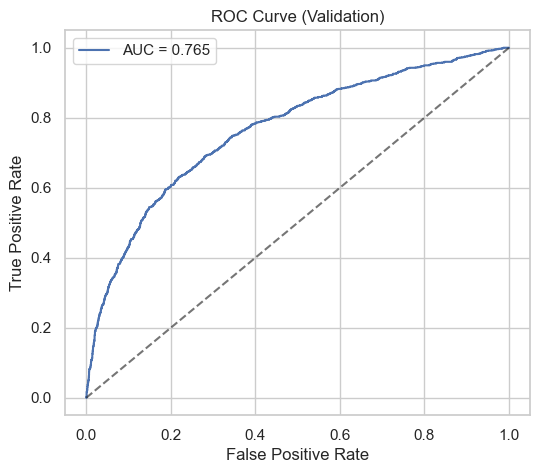

In [118]:
# 📈 ROC curve for validation set
from sklearn.metrics import roc_curve, auc

probs = model.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], 'k--', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation)')
plt.legend()
plt.show()


## ROC Curve Observation

- AUC = 0.765 indicates good model performance.
- Model effectively distinguishes between positive and negative cases.
- Shows decent predictive power above random chance.


In [119]:
# 📊 6.2 Feature importance for Logistic Regression (coefficients)
coefs = pd.Series(model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
coefs.head(15)


delayed_months          0.598495
max_delay               0.298455
avg_bill_limit_ratio   -0.229169
log_BILL_AMT5          -0.186458
avg_pay_ratio          -0.170960
LIMIT_BAL              -0.154748
log_BILL_AMT2          -0.136297
EDUCATION_4            -0.117862
MARRIAGE_2             -0.091762
log_BILL_AMT1          -0.084853
log_BILL_AMT4          -0.063128
SEX_2                  -0.059375
avg_bill_amt            0.057104
total_bill              0.057104
avg_pay_amt            -0.054707
dtype: float64

## 🔍 Our Observations:
- Features like `delayed_months` and `max_delay` have the largest positive influence, increasing the probability of the outcome.
- Financial indicators such as `LIMIT_BAL`, `avg_pay_ratio`, and various `BILL_AMT` features generally have negative coefficients, suggesting higher values are protective or reduce the likelihood of the target event.
- Categorical variables such as education and marriage status have moderate impacts, showing the importance of demographic factors.



In [120]:
# 💾 7. Save model, scaler and features for deployment
joblib.dump(model, "credit_default_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "features_used.pkl")

print("Saved model, scaler and features to disk.")

Saved model, scaler and features to disk.
